In this project, different techniques proposed to deal with imbalanced dataset were applied. 

For mor information and to downoladed the dataset [click here ](https://www.kaggle.com/datasets/mirzahasnine/heart-disease-dataset)

# Importing libraries and loading data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import shapiro
import seaborn as sns


# for feature engineering
from feature_engine.imputation import CategoricalImputer
from feature_engine.imputation import MeanMedianImputer

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.compose import make_column_transformer
# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder as fe_OneHotEncoder

from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce
from feature_engine import transformation as vt

# for the model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline


In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('data/heart_disease.csv')
data.head()



,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_stroke     4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [4]:
# Inspecting the variable values

for var in data.columns:
    print(var, data[var].unique()[0:20], '\n')

Gender ['Male' 'Female'] 

age [39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37] 

education ['postgraduate' 'primaryschool' 'uneducated' 'graduate' nan] 

currentSmoker [0 1] 

cigsPerDay [ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60.] 

BPMeds [ 0.  1. nan] 

prevalentStroke ['no' 'yes'] 

prevalentHyp [0 1] 

diabetes [0 1] 

totChol [195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234.] 

sysBP [106.  121.  127.5 150.  130.  180.  138.  100.  141.5 162.  133.  131.
 142.  124.  114.  140.  112.  122.  139.  108. ] 

diaBP [ 70.   81.   80.   95.   84.  110.   71.   89.  107.   76.   88.   94.
  64.   90.   78.   84.5  70.5  77.5  82.   68. ] 

BMI [26.97 28.73 25.34 28.58 23.1  30.3  33.11 21.68 26.36 23.61 22.91 27.64
 26.31 31.31 22.35 21.35 22.37 23.38 23.24 26.88] 

heartRate [80. 95. 75. 65. 85. 77. 60. 79. 76. 93. 72. 98. 64. 70. 71. 62. 73. 90.
 96. 68.] 

glucose [ 77.  76.  70. 1

# Data analysis
## Tareget analysis

In [5]:
data['Heart_stroke'].value_counts()/len(data)

No     0.848042
yes    0.151958
Name: Heart_stroke, dtype: float64

### Mapping response

In [6]:
stroke = {'yes': 1, 'No': 0}

data['Heart_stroke'] = data['Heart_stroke'].map(stroke)
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


The dataset is unbalanced with only 15 percent experinced. This issue will addressed later.

## Features analysis
### Classifying features according their type

In [7]:
# discrete features
discr_var = [var for var in data.columns if data[var].dtype!='O' 
              and var!='Heart_ stroke' and data[var].nunique()<10]
discr_var

['currentSmoker', 'BPMeds', 'prevalentHyp', 'diabetes', 'Heart_stroke']

In [8]:
# categorical features
cate_var = [var for var in data.columns if data[var].dtype=='O' and var!='Heart_stroke'] + discr_var
cate_var

['Gender',
 'education',
 'prevalentStroke',
 'currentSmoker',
 'BPMeds',
 'prevalentHyp',
 'diabetes',
 'Heart_stroke']

In [9]:
# continouse feature
contin_var = [var for var in data.columns if data[var].dtype!='O' and var!='Heart_ stroke' and var not in discr_var]
contin_var

['age',
 'cigsPerDay',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

### Missing data analysis

In [10]:
# missing values in categorical variables
cat_missing = [var for var in cate_var if data[var].isnull().mean()>0]
data[cat_missing].isnull().mean().sort_values(ascending = False)

education    0.024776
BPMeds       0.012506
dtype: float64

In [11]:
# #missing values in discrete variables
# discr_missing = [var for var in discr_var if data[var].isnull().mean()>0]
# data[discr_missing].isnull().mean().sort_values(ascending = False)

In [12]:
# missing values in continouse variables
contin_missing = [var for var in contin_var if data[var].isnull().mean()>0]
data[contin_missing].isnull().mean().sort_values(ascending = False)

glucose       0.091553
totChol       0.011798
cigsPerDay    0.006843
BMI           0.004483
heartRate     0.000236
dtype: float64

#### Distribution of variables with missing values : visual inspection

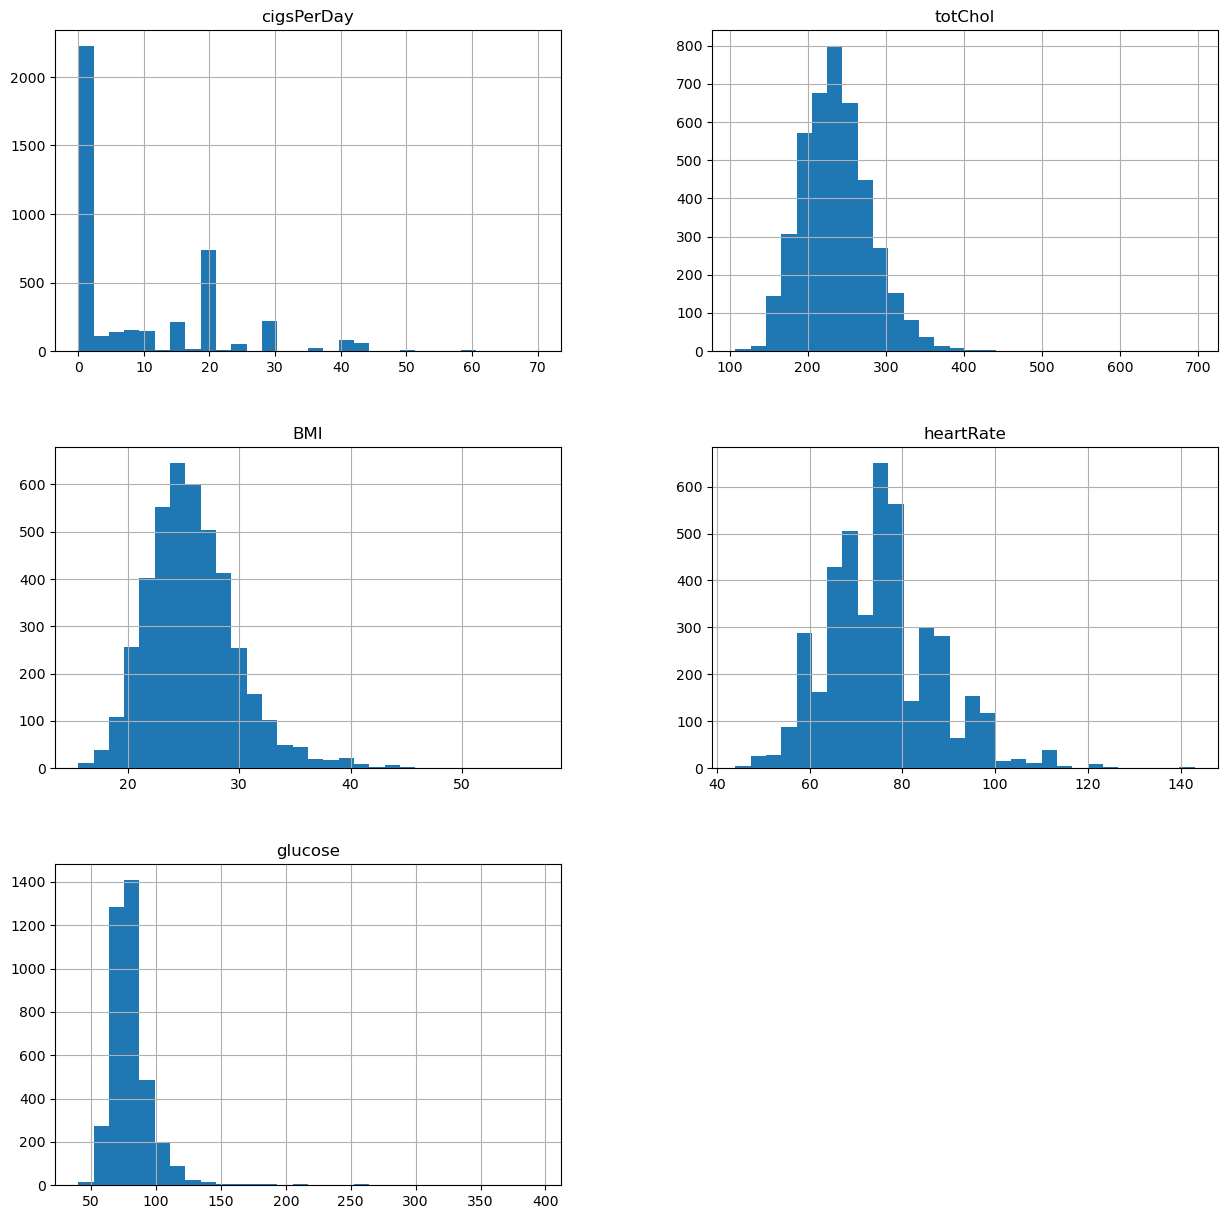

In [13]:
data[contin_missing].hist(bins=30, figsize=(15,15))
plt.show()

#### Distribution of variables with missing values : statistical test

In [14]:
norm_cont_var=[]
not_norm_cont_var = []

for var in data[contin_missing]:
    stat, p = shapiro(data[var])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
   
    alpha = 0.05
    if p > alpha:
        print(f'{var} variable is Gaussian')
        norm_cont_var.append(var)
        print()
        print()
    else:
        print(f'{var} variable is NOT Gaussian')
        not_norm_cont_var.append(var)
        print()
           

Statistics=nan, p=1.000
cigsPerDay variable is Gaussian


Statistics=nan, p=1.000
totChol variable is Gaussian


Statistics=nan, p=1.000
BMI variable is Gaussian


Statistics=nan, p=1.000
heartRate variable is Gaussian


Statistics=nan, p=1.000
glucose variable is Gaussian




In [15]:
norm_cont_var

['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

In [16]:
not_norm_cont_var

[]

Based on results of visual and statistical inspectin, all continouse features with missing values are normaliy distributed. Therefore **"Mean"** imputation will be performed latter on.

#### Distribution of continouse  variables 
These features are continouse varible other than those contains missing values which showed to be normaly distributed

In [17]:
contin_no_norm = [var for var in contin_var if var not in contin_missing]

In [18]:
contin_no_norm

['age', 'sysBP', 'diaBP']

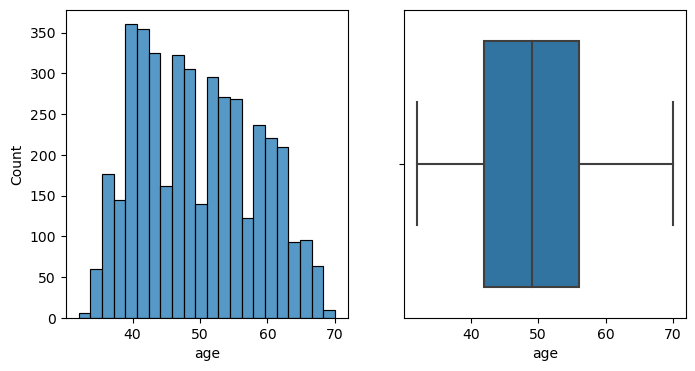

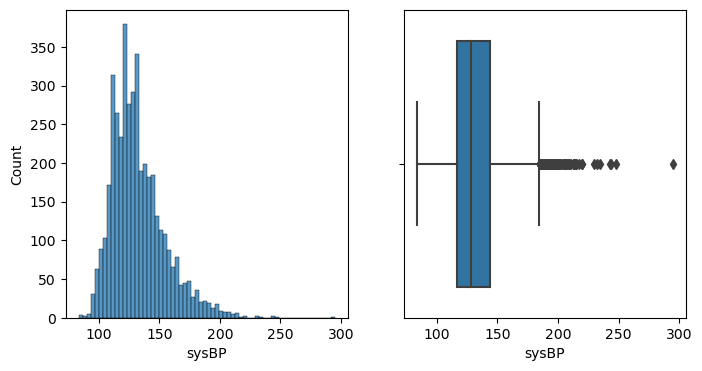

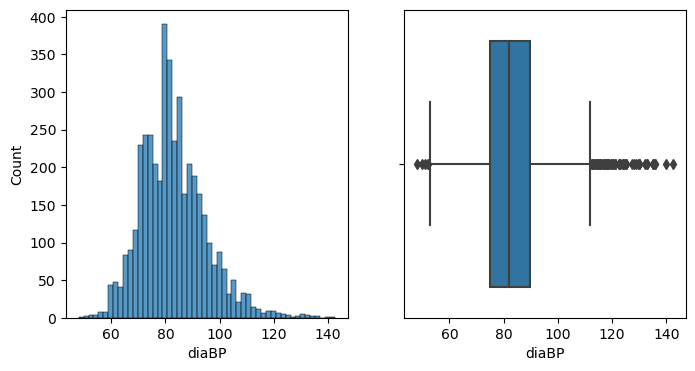

In [19]:
# Viewing features' distribution of orginal values
for col in data[contin_no_norm]:
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    sns.histplot(data=data, x=col, ax=ax[0])
    sns.boxplot(data=data, x=col, ax=ax[1])
    plt.show()

All three features(['age', 'sysBP', 'diaBP') show sign of abnormality.  'sysBP', 'diaBP' have also outliers

### Number of categories  in categorical variables

In [20]:
# checking the high cardinality (too many possible values for a single variable)
data[cate_var].nunique()

Gender             2
education          4
prevalentStroke    2
currentSmoker      2
BPMeds             2
prevalentHyp       2
diabetes           2
Heart_stroke       2
dtype: int64

**No variable has high cardinality**


# Features  engineering
- Will  impute missing values in continouse features with **Mean**
- Will  impute missing values in continouse features with **Mode**
- Will check the distribution and transform the non normaly distributed features if any
- will scale the features

In [21]:
data.head()

,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [22]:
# separate dataset into train and test
data.reindex()
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['Heart_stroke'], axis=1),  # drop the target
    data['Heart_stroke'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2966, 15), (2966,), (1272, 15), (1272,))

## Mean imputation for continouse features

In [23]:
imputer = MeanMedianImputer(imputation_method='mean',
                            variables=['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose'])

imputer.fit(X_train)

MeanMedianImputer(imputation_method='mean',
                  variables=['cigsPerDay', 'totChol', 'BMI', 'heartRate',
                             'glucose'])

In [24]:
imputer.imputer_dict_

{'cigsPerDay': 9.071088435374149,
 'totChol': 236.92307692307693,
 'BMI': 25.817722033898306,
 'heartRate': 75.79460370994941,
 'glucose': 82.11967395331604}

In [25]:
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

In [26]:
# confirm no missing values in continouse variables
contin_missing = [var for var in contin_var if X_train[var].isnull().mean()>0]
contin_missing

[]

## Mode imputation for categorical features


In [27]:
# categorical features with missing values
cat_missing

['education', 'BPMeds']

In [28]:

features_categoric = ['education', 'BPMeds']

preprocessor = ColumnTransformer(
    transformers=[
    
        ("categoric_imputer", SimpleImputer(strategy="most_frequent"),features_categoric),
        
    ],remainder="passthrough"
)

In [29]:
preprocessor.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('categoric_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['education', 'BPMeds'])])

In [30]:
preprocessor.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('categoric_imputer',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['education', 'BPMeds'])])

In [31]:
# for frequent category imputer

preprocessor.named_transformers_["categoric_imputer"].statistics_

array(['uneducated', 0.0], dtype=object)

In [32]:
# applying to dataset
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [33]:
# inspect nan in mode imputed features (education)
X_train.categoric_imputer__education.unique()

array(['uneducated', 'primaryschool', 'graduate', 'postgraduate'],
      dtype=object)

In [34]:
# inspect nan in mode imputed features m(BPMeds)
X_train.categoric_imputer__BPMeds.unique()

array([0.0, 1.0], dtype=object)

In [35]:
# categorical imputer change the name of feature by adding 'categoric_imputer__'to imoyted variables 
# and 'remainder__' to the rest of features.
# to simplify the coding, will restore the original names

 
orginal_names = [sub.replace('categoric_imputer__', '').replace('remainder__', '') for sub in X_train.columns]

orginal_names   

['education',
 'BPMeds',
 'Gender',
 'age',
 'currentSmoker',
 'cigsPerDay',
 'prevalentStroke',
 'prevalentHyp',
 'diabetes',
 'totChol',
 'sysBP',
 'diaBP',
 'BMI',
 'heartRate',
 'glucose']

In [36]:
# Replaceing orginal names
X_train.columns= orginal_names
X_test.columns= orginal_names
X_train.columns

Index(['education', 'BPMeds', 'Gender', 'age', 'currentSmoker', 'cigsPerDay',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')

### Categorical encoding

In [37]:
encoding_var = [var for var in X_train.columns if X_train[var].dtype=='O' and var!='categoric_imputer__BPMeds'] 
encoding_var

['education', 'BPMeds', 'Gender', 'prevalentStroke']

In [38]:

ohe_enc = fe_OneHotEncoder(
    top_categories=None,
    variables=encoding_var,  # we can select which variables to encode
    drop_last=True)  # to return k-1, false to return k


In [39]:
 ohe_enc.fit(X_train)

OneHotEncoder(drop_last=True,
              variables=['education', 'BPMeds', 'Gender', 'prevalentStroke'])

In [40]:
X_train = ohe_enc.transform(X_train)
X_test = ohe_enc.transform(X_test)
X_train.head()

,age,currentSmoker,cigsPerDay,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_uneducated,education_primaryschool,education_graduate,BPMeds_0.0,Gender_Male,prevalentStroke_no
264,57,0,0.0,1,0,176.0,134.0,97.0,38.14,68.0,94.000000,1,0,0,1,1,1
385,39,0,0.0,0,0,235.0,120.0,80.0,27.23,62.0,87.000000,0,1,0,1,1,1
2564,54,0,0.0,1,0,207.0,146.0,98.0,23.63,65.0,91.000000,0,1,0,1,1,1
3787,49,0,0.0,0,0,203.0,125.0,70.0,22.52,72.0,82.119674,0,0,1,1,0,1
4139,53,0,0.0,0,0,252.0,122.5,75.5,25.29,75.0,71.000000,0,0,1,1,0,1


### Data transformation
After imputation will check features that are not normaly distributed, some data transformation will be performed to obtain normal distribution. In the follwong cells will explores performance some data transformatin methods. 

In [41]:
norm_cont_var=[]
not_norm_cont_var = []

for var in X_train[contin_var]:
    stat, p = shapiro(data[var])
    print('Statistics=%.3f, p=%.3f' % (stat, p))
   
    alpha = 0.05
    if p > alpha:
        print(f'{var} variable is Gaussian')
        norm_cont_var.append(var)
        print()
        print()
    else:
        print(f'{var} variable is NOT Gaussian')
        not_norm_cont_var.append(var)
        print()
           

Statistics=0.967, p=0.000
age variable is NOT Gaussian

Statistics=nan, p=1.000
cigsPerDay variable is Gaussian


Statistics=nan, p=1.000
totChol variable is Gaussian


Statistics=0.935, p=0.000
sysBP variable is NOT Gaussian

Statistics=0.974, p=0.000
diaBP variable is NOT Gaussian

Statistics=nan, p=1.000
BMI variable is Gaussian


Statistics=nan, p=1.000
heartRate variable is Gaussian


Statistics=nan, p=1.000
glucose variable is Gaussian




In [42]:
norm_cont_var

['cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

In [43]:
not_norm_cont_var

['age', 'sysBP', 'diaBP']

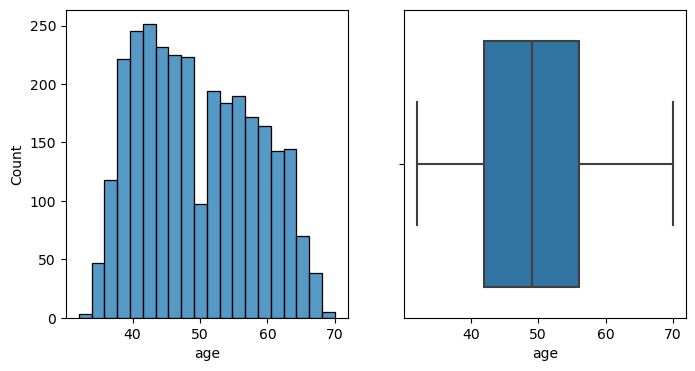

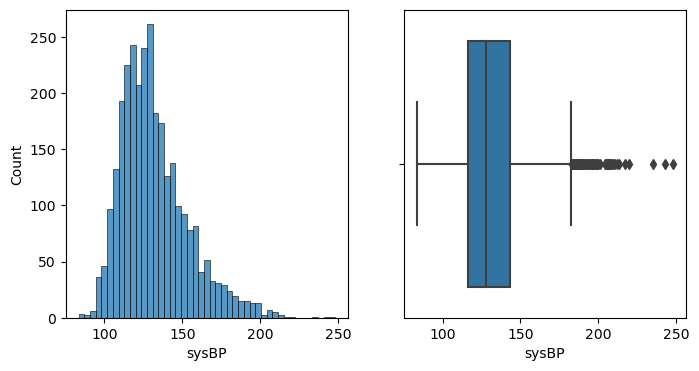

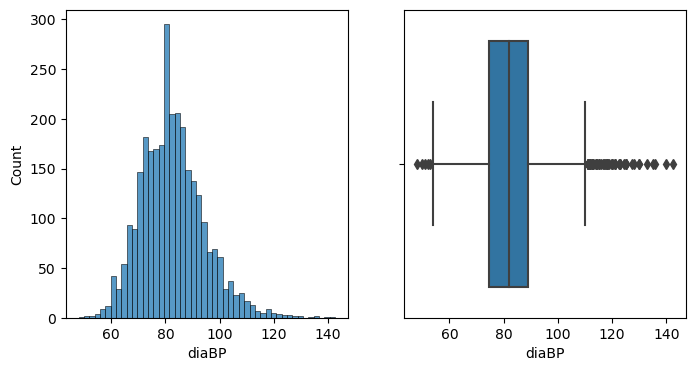

In [44]:
# Viewing features' distribution of orginal values
for col in X_train[not_norm_cont_var]:
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    sns.histplot(data=X_train, x=col, ax=ax[0])
    sns.boxplot(data=X_train, x=col, ax=ax[1])
    plt.show()


#### Log transformation


In [45]:
import feature_engine.transformation as vt

In [46]:
lt = vt.LogTransformer(variables = not_norm_cont_var)
lt.fit(X_train)

LogTransformer(variables=['age', 'sysBP', 'diaBP'])

In [47]:
# variables that will be transformed
lt.variables_

['age', 'sysBP', 'diaBP']

In [48]:
log_trans = lt.transform(X_train)

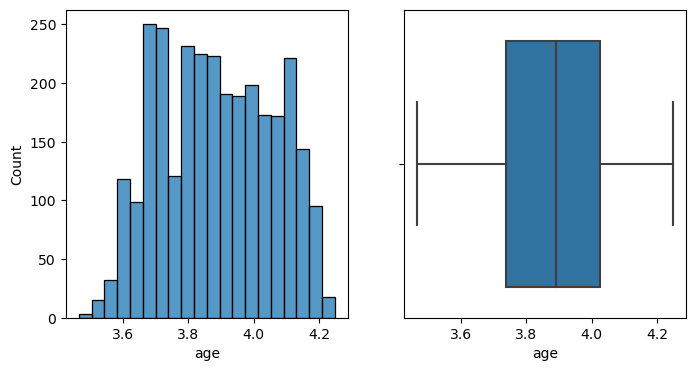

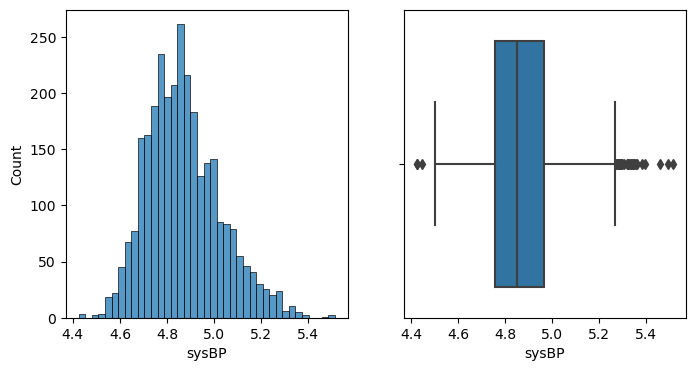

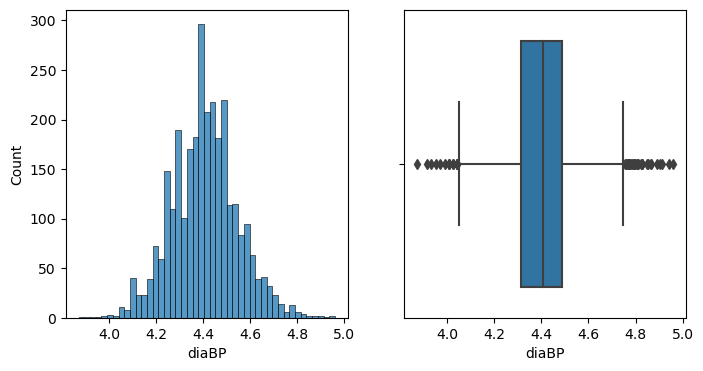

In [49]:
# Viewing features' distribution of log_transformed values

for col in log_trans[not_norm_cont_var]:
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    sns.histplot(data=log_trans, x=col, ax=ax[0])
    sns.boxplot(data=log_trans, x=col, ax=ax[1])
    plt.show()


#### Box-Cox transformation_sklearn


In [50]:
bct = vt.BoxCoxTransformer(variables = not_norm_cont_var)
bct.fit(X_train)

BoxCoxTransformer(variables=['age', 'sysBP', 'diaBP'])

In [51]:
# these are the exponents for the BoxCox transformation
bct.lambda_dict_

{'age': 0.06321993444036467,
 'sysBP': -1.2690686267253135,
 'diaBP': -0.27030069107314025}

In [52]:
bct_trans = bct.transform(X_train)

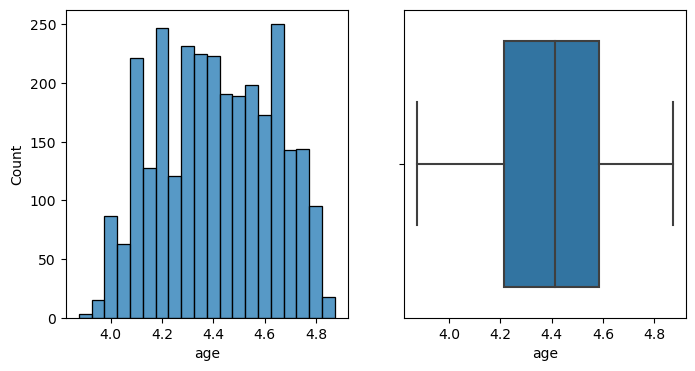

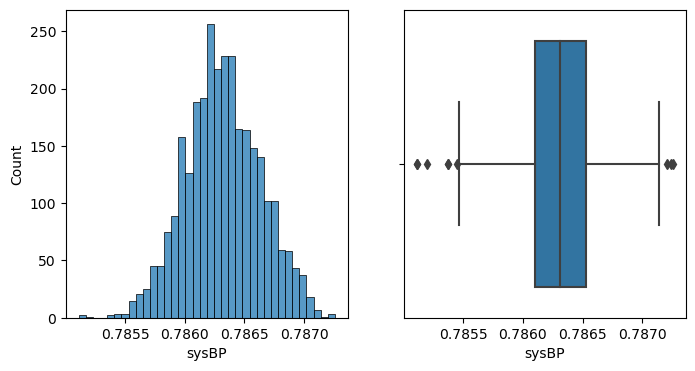

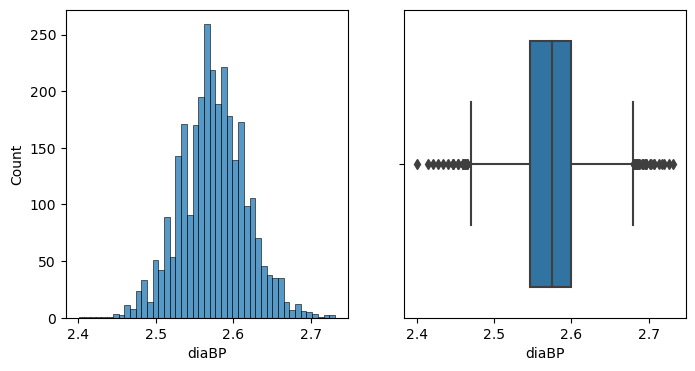

In [53]:
for col in bct_trans[not_norm_cont_var]:
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    sns.histplot(data=bct_trans, x=col, ax=ax[0])
    sns.boxplot(data=bct_trans, x=col, ax=ax[1])
    plt.show()


#### Yeo-Johnson transformation


In [54]:
yjt = vt.YeoJohnsonTransformer(variables = not_norm_cont_var)
yjt.fit(X_train)

YeoJohnsonTransformer(variables=['age', 'sysBP', 'diaBP'])

In [55]:
yjt_trans = yjt.transform(X_train)

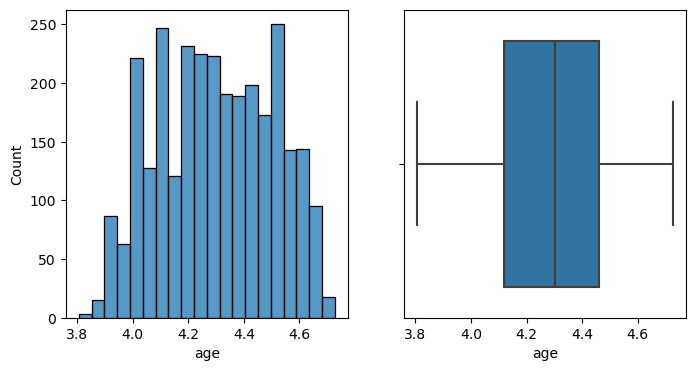

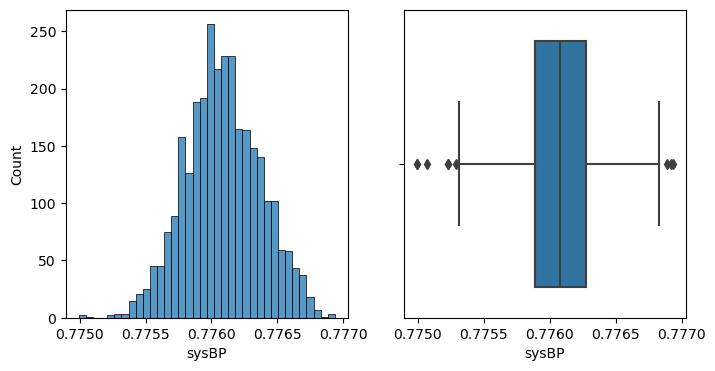

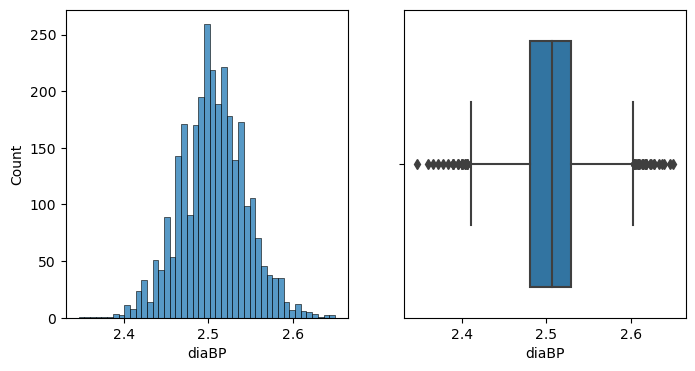

In [56]:
for col in yjt_trans[not_norm_cont_var]:
    fig, ax = plt.subplots(1, 2, figsize=(8,4))
    sns.histplot(data=yjt_trans, x=col, ax=ax[0])
    sns.boxplot(data=yjt_trans, x=col, ax=ax[1])
    plt.show()


From inspecting , seems the **Box-Cox transformation**  and **Yeo-Johnson transformation** give better distributions for all 3 features. However there are few outlires in 'sysBP'and 'diaBP' features. **Yeo-Johnson transformation** will be used.

In [57]:
# Applying Yeo-Johnson transformation on X_train and X_test 
X_train = yjt.transform(X_train)
X_test = yjt.transform(X_test)

### Equal frequency discretisation with Feature-Engine

In [58]:
from feature_engine.discretisation import EqualFrequencyDiscretiser

In [59]:
disc = EqualFrequencyDiscretiser(q=10, variables = ['sysBP', 'diaBP'])

disc.fit(X_train)

EqualFrequencyDiscretiser(variables=['sysBP', 'diaBP'])

In [60]:
disc.binner_dict_

{'sysBP': [-inf,
  0.775732091384358,
  0.775839886122872,
  0.7759325743302634,
  0.7760087576599506,
  0.776078896456634,
  0.7761436569522363,
  0.7762288497341523,
  0.7763328952431755,
  0.7764601014838449,
  inf],
 'diaBP': [-inf,
  2.457765942060768,
  2.4740998757503765,
  2.4856225925277933,
  2.5001180190987227,
  2.5070247852475913,
  2.5153630917781777,
  2.5241789856004733,
  2.5386076312580106,
  2.5555320542963855,
  inf]}

In [61]:
X_train = disc.transform(X_train)
X_test = disc.transform(X_test)

X_train.head()

,age,currentSmoker,cigsPerDay,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,education_uneducated,education_primaryschool,education_graduate,BPMeds_0.0,Gender_Male,prevalentStroke_no
264,4.480919,0,0.0,1,0,176.0,6,8,38.14,68.0,94.000000,1,0,0,1,1,1
385,4.033812,0,0.0,0,0,235.0,3,3,27.23,62.0,87.000000,0,1,0,1,1,1
2564,4.416525,0,0.0,1,0,207.0,7,8,23.63,65.0,91.000000,0,1,0,1,1,1
3787,4.301371,0,0.0,0,0,203.0,4,1,22.52,72.0,82.119674,0,0,1,1,0,1
4139,4.394314,0,0.0,0,0,252.0,3,2,25.29,75.0,71.000000,0,0,1,1,0,1


Text(0, 0.5, 'Number of observations per bin')

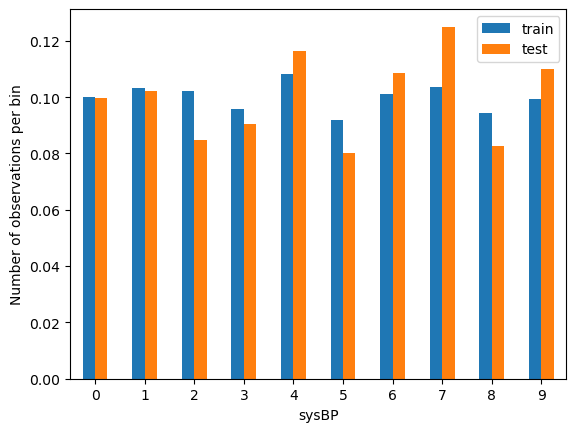

In [62]:
# and now let's explore the number of observations per bucket

t1 = X_train.groupby(['sysBP'])['sysBP'].count() / len(X_train)
t2 = X_test.groupby(['sysBP'])['sysBP'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

Text(0, 0.5, 'Number of observations per bin')

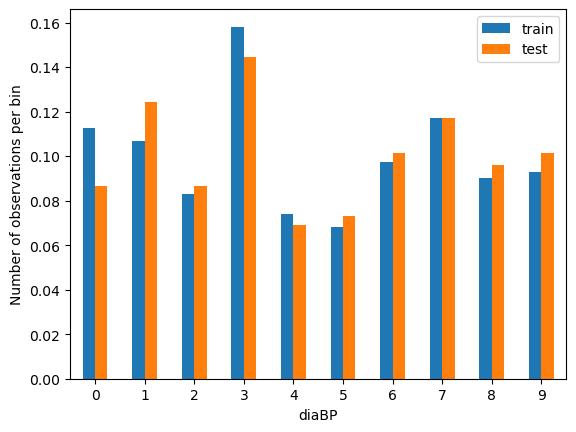

In [63]:
# and now let's explore the number of observations per bucket

t1 = X_train.groupby(['diaBP'])['diaBP'].count() / len(X_train)
t2 = X_test.groupby(['diaBP'])['diaBP'].count() / len(X_test)

tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')

### Scaling

In [64]:
scale_var = [var for var in contin_var if var not in ['sysBP', 'diaBP']]
scale_var

['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose']

In [65]:
stand_scaler = ColumnTransformer(
    transformers=[
        ("stand", StandardScaler(), scale_var)],remainder="passthrough",
    
)

In [66]:
stand_scaler.set_output(transform="pandas")

ColumnTransformer(remainder='passthrough',
                  transformers=[('stand', StandardScaler(),
                                 ['age', 'cigsPerDay', 'totChol', 'BMI',
                                  'heartRate', 'glucose'])])

In [67]:
stand_scaler.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('stand', StandardScaler(),
                                 ['age', 'cigsPerDay', 'totChol', 'BMI',
                                  'heartRate', 'glucose'])])

In [68]:
stand_scaler.transformers

[('stand',
  StandardScaler(),
  ['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose'])]

In [69]:

X_train = stand_scaler.transform(X_train)


In [70]:
X_test = stand_scaler.transform(X_test)

In [71]:
# reverse the modification in columns name  caused by sklearn imputer  
orginal_names = [sub.replace('stand__', '').replace('remainder__', '') for sub in X_train.columns]
orginal_names


['age',
 'cigsPerDay',
 'totChol',
 'BMI',
 'heartRate',
 'glucose',
 'currentSmoker',
 'prevalentHyp',
 'diabetes',
 'sysBP',
 'diaBP',
 'education_uneducated',
 'education_primaryschool',
 'education_graduate',
 'BPMeds_0.0',
 'Gender_Male',
 'prevalentStroke_no']

In [72]:
# Rplaceing orginal names
X_train.columns= orginal_names
X_test.columns= orginal_names

In [73]:
X_test.head()

,age,cigsPerDay,totChol,BMI,heartRate,glucose,currentSmoker,prevalentHyp,diabetes,sysBP,diaBP,education_uneducated,education_primaryschool,education_graduate,BPMeds_0.0,Gender_Male,prevalentStroke_no
1669,-0.225350,-0.758292,1.571653,0.448153,-0.065589,-0.878257,0,1,0,4,8,1,0,0,1,0,1
156,0.995733,-0.758292,-0.967854,-0.604428,-1.303740,-0.398089,0,1,0,8,4,0,1,0,1,0,1
87,1.291042,-0.674698,2.056468,3.109119,-1.551370,-0.179831,1,1,0,9,9,0,1,0,1,0,1
685,-0.475720,-0.758292,-0.506126,0.025153,1.997995,-0.310786,0,1,0,8,4,0,1,0,1,0,1
666,0.894112,-0.758292,1.156097,0.103851,-0.891023,-0.485392,0,0,0,6,7,1,0,0,1,0,1


# Saving data

In [74]:
import os  
os.makedirs('data', exist_ok=True)  
X_train.to_csv('data/X_traint.csv')  
X_test.to_csv('data/X_test.csv')

y_train.to_csv('data/y_traint.csv')  
y_test.to_csv('data/y_test.csv')